In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# loading the SPECTRA results file
s = sio.loadmat('./Results/Results_SPECTRA_ME_Runtime.mat')

In [4]:
# n_d refers to number of data points
n_d = 10
ids = [int(i) for i in np.linspace(0, 528, n_d)]
df = pd.DataFrame(columns=['n_rxns', 'runtime','LPs', 'Algorithm'])
for i in range(len(ids)):
    id = ids[i]
    n_rxns = s['n'][0][id]
    fct = s['fctimes'][0][id]
    fclp = s['fcLPS'][0][id]
    
    sp2t = s['sp2times'][0][id]
    sp2lp = s['sp2LPS'][0][id]

    spt = s['sptimes'][0][id]
    splp = s['spLPS'][0][id]

    swRt = s['swRtimes'][0][id]
    swRlp = s['swRLPS'][0][id]

    swWRt = s['swWRtimes'][0][id]
    swWRlp = s['swWRLPS'][0][id]

    df= pd.concat([df, pd.DataFrame({'n_rxns': [n_rxns]*5, 'runtime': [fct, sp2t, spt, swRt, swWRt], 'LPs': [fclp, sp2lp, splp, swRlp, swWRlp], 
                                        'Algorithm': ['Fastcore', 'SPECTRA_ME2', 'SPECTRA_ME', 'Swiftcore-R', 'Swiftcore-WR']})], ignore_index=True)
df.head()


/tmp/ipykernel_107063/1372628606.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df= pd.concat([df, pd.DataFrame({'n_rxns': [n_rxns]*5, 'runtime': [fct, sp2t, spt, swRt, swWRt], 'LPs': [fclp, sp2lp, splp, swRlp, swWRlp],


,n_rxns,runtime,LPs,Algorithm
0,20,1.173674,8,Fastcore
1,20,0.340197,3,SPECTRA_ME2
2,20,0.556895,3,SPECTRA_ME
3,20,4.030772,10,Swiftcore-R
4,20,1.177381,10,Swiftcore-WR


In [5]:

def plot_bar_plot(df,variable, algos,ax):
    labels = list(df['n_rxns'].unique())
    labels.sort()  # Ensure labels are sorted for consistent bar placement
    values = [df[df['Algorithm'] == algo][variable].values for algo in algos]

    x = np.arange(len(labels))  # label locations
    width = 0.25  # width of the bars
    # setting only the x-axis grid
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, linestyle='-', alpha=0.5) 
    ax.set_axisbelow(True)
    colors = {'Fastcore':'#008080','Swiftcore-WR': '#004080','Swiftcore-R':'#004080', 'SPECTRA_ME': '#80c080', 'SPECTRA_ME2': '#80c080'} 
    # Bars with design-matching colors
    for k in range(len(algos)):
        ax.bar(x + k * width, values[k], width, color=colors[algos[k]], label=algos[k])

    # Set x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=14*2, rotation=45, ha='right')

    # Remove legend and grid lines
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)
    # ax.legend()
    ax.legend(fontsize=14*2,loc='upper center', bbox_to_anchor=(0.5, -0.25),
          ncol=3, frameon=False)

    ylabel_dict = {'runtime': 'Runtime in seconds', 'LPs': 'Number of LPs solved'}

    # Remove chart border (top/right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel('Number of core reactions', fontsize=16*2, fontweight='bold')
    ax.set_ylabel(ylabel_dict[variable], fontsize=16*2, fontweight='bold')



/tmp/ipykernel_107063/534539284.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)
/tmp/ipykernel_107063/534539284.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)


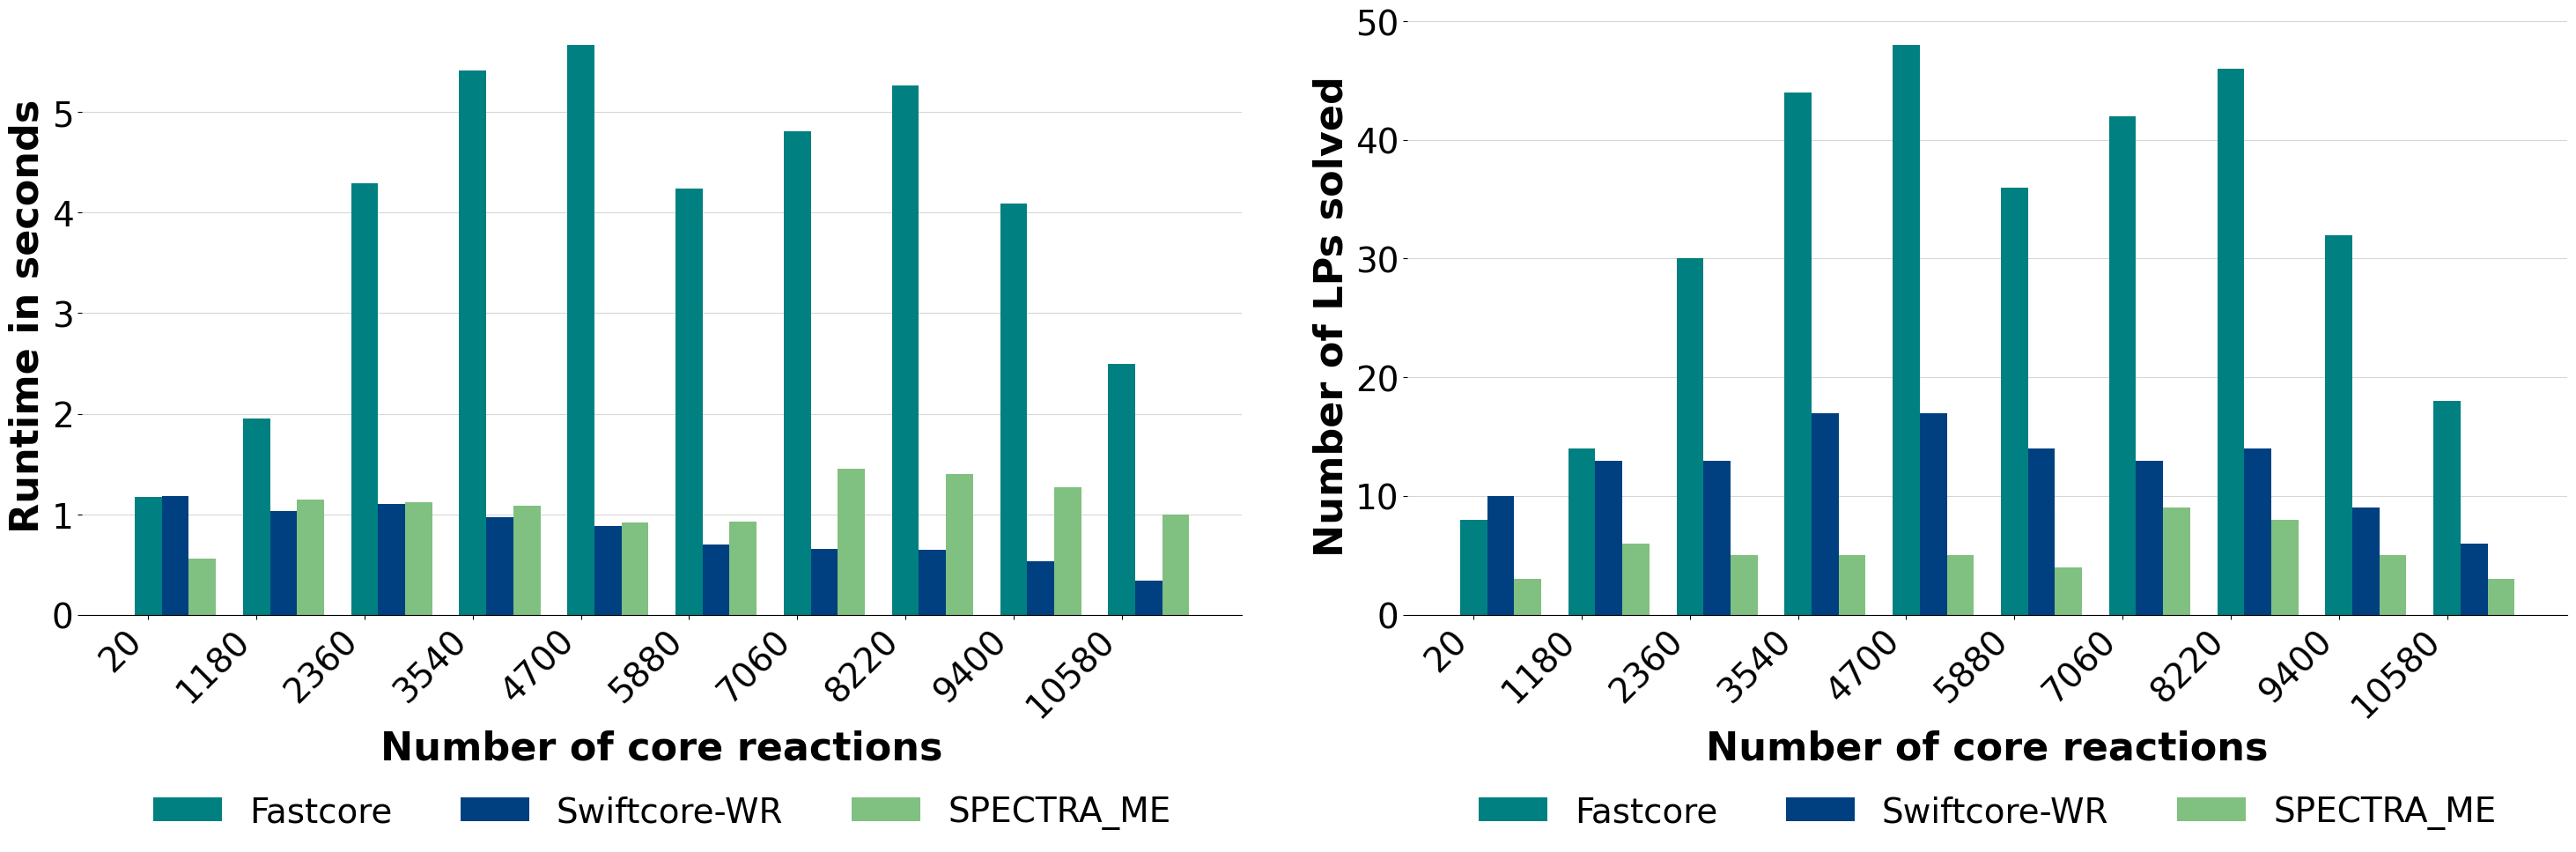

In [6]:
fig, ax = plt.subplots(1,2,figsize=(30, 10))
plot_bar_plot(df,'runtime', ['Fastcore', 'Swiftcore-WR', 'SPECTRA_ME'],ax[0])
plot_bar_plot(df,'LPs', ['Fastcore', 'Swiftcore-WR', 'SPECTRA_ME'],ax[1])
plt.tight_layout()
plt.savefig('./SPECTRA_ME_runtime.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_107063/534539284.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)


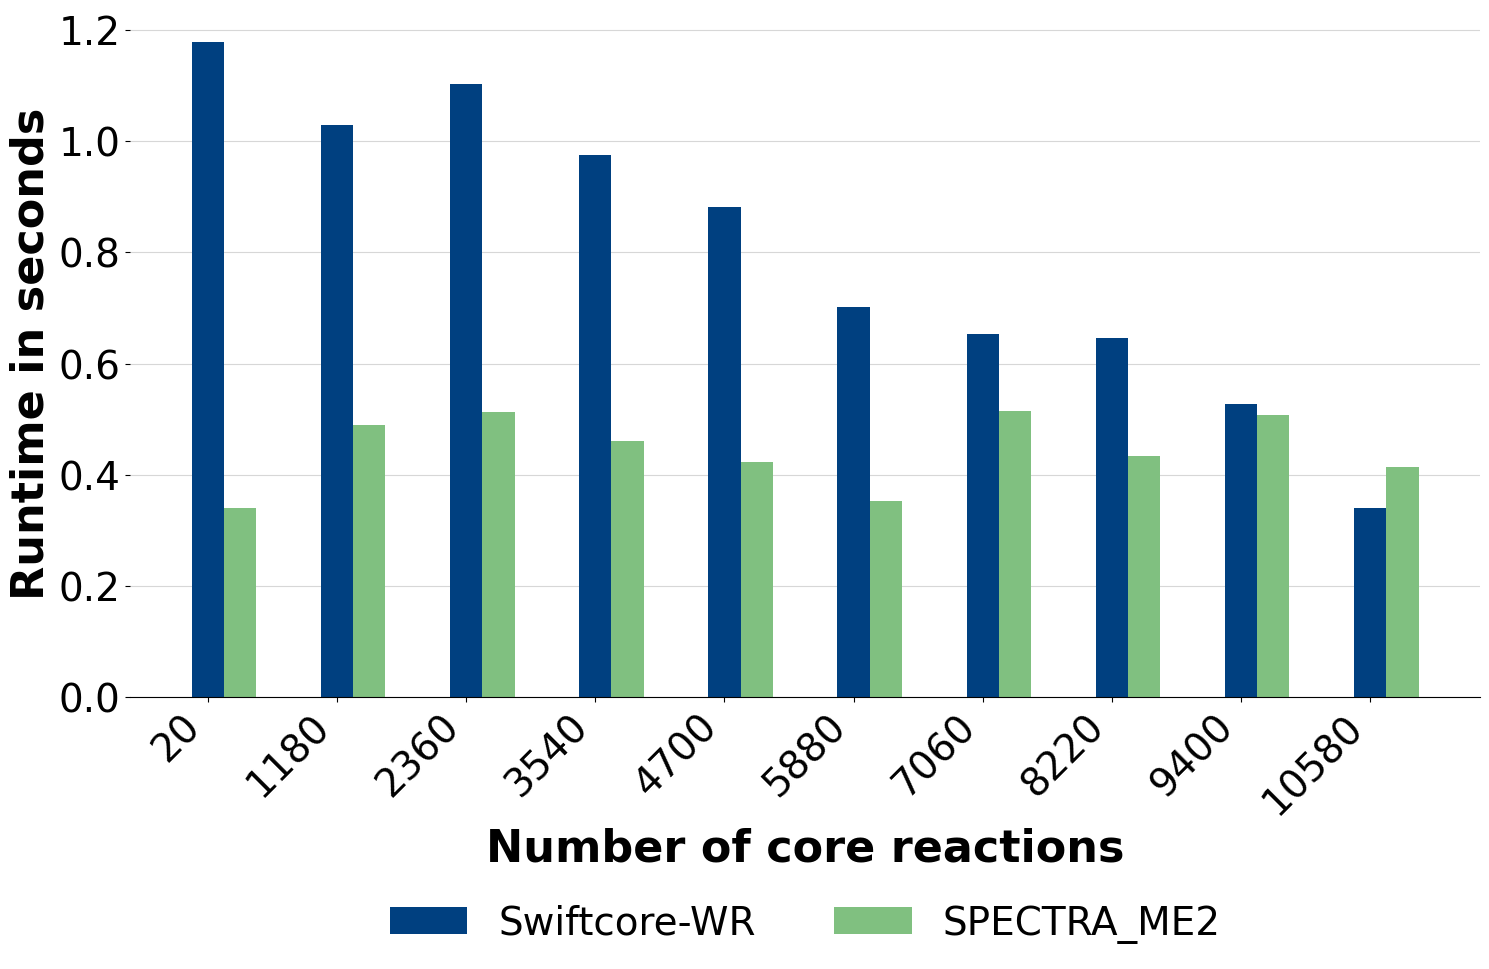

/tmp/ipykernel_107063/534539284.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)


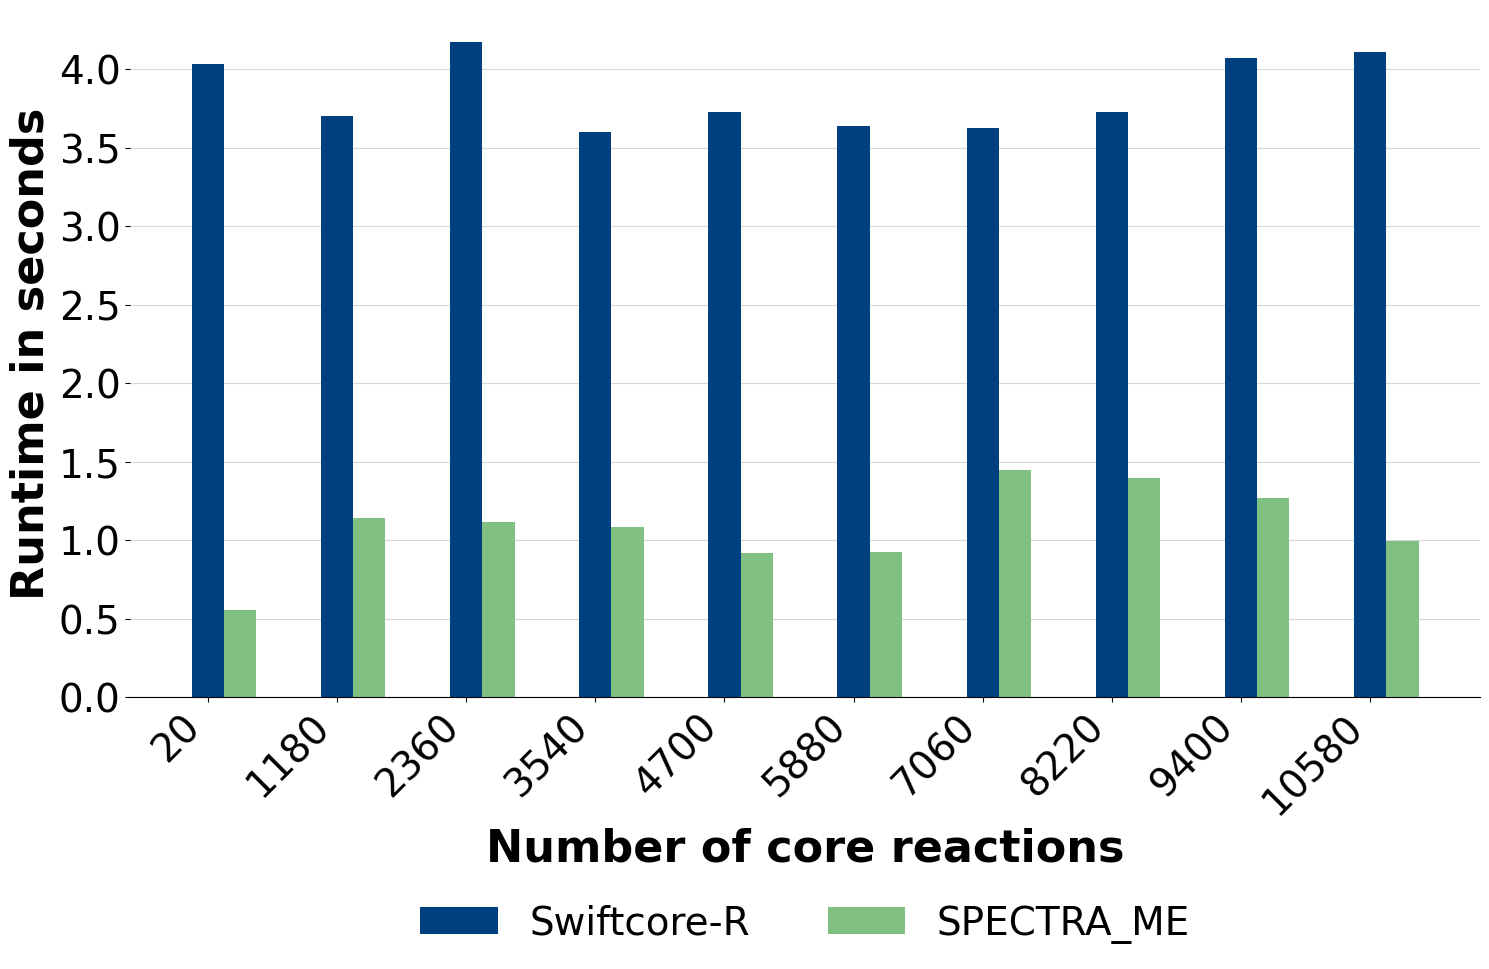

In [7]:
fig, ax0 = plt.subplots(1,1,figsize=(15, 10))
plot_bar_plot(df,'runtime', ['Swiftcore-WR', 'SPECTRA_ME2'],ax0)
plt.tight_layout()
plt.savefig('./SPECTRA_ME_runtime2.png', bbox_inches='tight')
plt.show()

fig, ax1 = plt.subplots(1,1,figsize=(15, 10))
plot_bar_plot(df,'runtime', ['Swiftcore-R', 'SPECTRA_ME'],ax1)
plt.tight_layout()
plt.savefig('./SPECTRA_ME_runtime3.png', bbox_inches='tight')
plt.show()